In [1]:
import plotting
import importlib
importlib.reload(plotting)
import scipy
import numpy as np
import transforms
import sampling

import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

  0%|          | 0/2 [00:00<?, ?it/s]

Edgington [[0.33112034 0.5010499 ]
 [0.5010499  0.50029579]] [[0.08883472 0.08336015]
 [0.08336015 0.08346797]]
Fisher [[-2.00842352 -0.99689215]
 [-0.99689215 -0.99947067]] [[3.95930879 0.99746666]
 [0.99746666 1.0004782 ]]
Power log [[-2.00842352 -0.99689215]
 [-0.99689215 -0.99947067]] [[3.95930879 0.99746666]
 [0.99746666 1.0004782 ]]


 50%|█████     | 1/2 [00:00<00:00,  3.49it/s]

Power Edgington [[2.00842352 0.99689215]
 [0.99689215 0.99947067]] [[3.95930879 0.99746666]
 [0.99746666 1.0004782 ]]
Edgington [[0.33112034 0.5010499 ]
 [0.5010499  0.50029579]] [[0.08883472 0.08336015]
 [0.08336015 0.08346797]]
Fisher [[-2.00842352 -0.99689215]
 [-0.99689215 -0.99947067]] [[3.95930879 0.99746666]
 [0.99746666 1.0004782 ]]


100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

Power log [[-1.50052874 -1.45405453]
 [-1.45405453 -1.38453654]] [[0.00145021 0.00088349]
 [0.00088349 0.00088931]]
Power Edgington [[1.6094306  1.19759697]
 [1.19759697 0.99919539]] [[0.02461954 0.00486011]
 [0.00486011 0.00433042]]


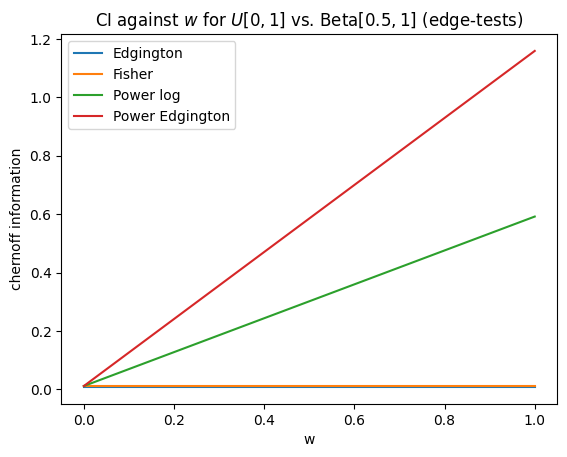

In [2]:
for ga in [0.5,1,2]:
    for gb in [2,1,0.5]:
        w = -1
        if 1 + gb - ga != 0:
            w = (1 - ga)/(1 + gb - ga)
        ga,gb = 0.5,1
        gamma_dists, gamma_params = sampling.standard_dist_matrix(scipy.stats.beta, [ga,gb])
        model = sampling.WSBM(f"Beta$[{ga},{gb}]$", gamma_dists, gamma_params, np.array([0.2,0.8]))
        plotting.plot_transforms_analytic(model, transforms.TRANSFORMS, 1, N=100_000,n = 1_000, gran = 1)
        break
    break

In [3]:
X = scipy.stats.gamma.rvs(0.5, 0, 1/2, size=(10,10))
X = X @ X.T
I = np.eye(10)

In [4]:
E1 = scipy.linalg.eigh(X,I)
E1

(array([0.01081912, 0.02241173, 0.10622331, 0.1668929 , 0.27049192,
        0.30271883, 0.43645033, 0.9310892 , 1.9309927 , 5.80603269]),
 array([[ 0.15661428,  0.03174124,  0.11478771, -0.19460921,  0.45855862,
         -0.32422452,  0.1192782 ,  0.71203355, -0.13023615, -0.2642677 ],
        [ 0.38087197, -0.3075159 , -0.27820462, -0.22600242,  0.10553497,
         -0.0760146 ,  0.024183  , -0.42961774,  0.03782737, -0.6545171 ],
        [-0.769456  , -0.00617372, -0.37137821, -0.28100377, -0.09075712,
          0.11256926,  0.11168506,  0.08958474, -0.25894824, -0.28731968],
        [-0.06072434,  0.15742208,  0.11988558,  0.25895201, -0.20814791,
          0.07919098,  0.70572087,  0.09023049,  0.49615301, -0.29690753],
        [-0.06102299,  0.10293634,  0.54139137,  0.39592786, -0.14648077,
          0.06851711, -0.12981635, -0.08906072, -0.52373869, -0.4588892 ],
        [ 0.24737417,  0.87228135, -0.37298549, -0.0057648 , -0.03986524,
          0.06182173, -0.10004403, -0.02430

In [5]:
E2 = scipy.linalg.eigh(I,X)
E2

(array([ 0.17223465,  0.51786835,  1.07401095,  2.29121147,  3.30339545,
         3.69696813,  5.99186647,  9.41412919, 44.61949377, 92.42895409]),
 array([[-0.10967417, -0.09372193,  0.73791241,  0.1805484 , -0.58928602,
         -0.88169366, -0.47637006, -0.35219686, -0.21202457, -1.50568938],
        [-0.27163221,  0.02722174, -0.44523219,  0.03660519, -0.13815839,
         -0.20291737, -0.55321526,  0.8536    ,  2.05413934, -3.66170228],
        [-0.11924101, -0.1863471 ,  0.0928407 ,  0.16905487,  0.2045974 ,
          0.17450327, -0.68784916,  1.13947944,  0.04123909,  7.39754827],
        [-0.12322008,  0.35704694,  0.09350992,  1.06823191,  0.14393155,
          0.40021643,  0.63387023, -0.36783837, -1.05154524,  0.58380367],
        [-0.19044435, -0.37689844, -0.09229763, -0.19649974,  0.12453152,
          0.28164592,  0.96916367, -1.66112153, -0.68759235,  0.58667491],
        [-0.04669306, -0.07235948, -0.025191  , -0.15143413,  0.11236251,
          0.07665089, -0.01411125

In [6]:
x,y = E2[1].T[0],E1[1].T[-1]

In [7]:
x / y

array([0.41501162, 0.41501162, 0.41501162, 0.41501162, 0.41501162,
       0.41501162, 0.41501162, 0.41501162, 0.41501162, 0.41501162])

  0%|          | 0/2 [00:00<?, ?it/s]

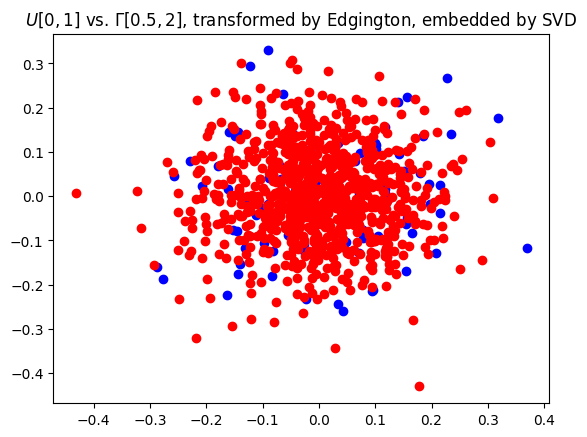

0.032203891142454186


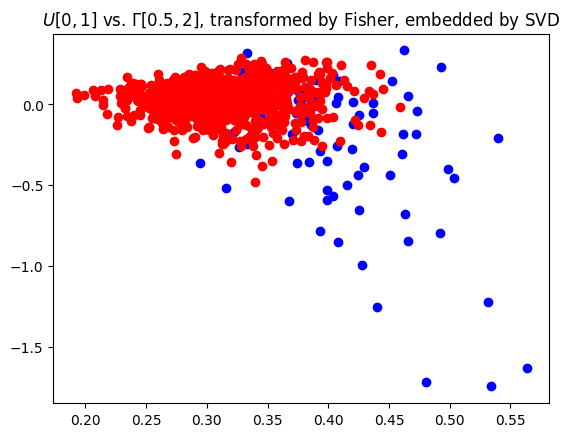

0.3177494886970217


  0%|          | 0/2 [00:09<?, ?it/s]


KeyboardInterrupt: 

In [8]:
for ga in [0.5,1,2]:
    for gb in [2,1,0.5]:
        w = -1
        if 1 + gb - ga != 0:
            w = (1 - ga)/(1 + gb - ga)
        gamma_dists, gamma_params = sampling.standard_dist_matrix(scipy.stats.gamma, [ga,0,1/gb])
        model = sampling.WSBM(f"$\Gamma[{ga},{gb}]$", gamma_dists, gamma_params, np.array([0.1,0.9]))
        plotting.plot_transforms_empirical(model, transforms.TRANSFORMS, 0.1, N =100_000, n = 1_000, gran = 1,mode="SVD")
        break
    break

  0%|          | 0/6 [00:00<?, ?it/s]

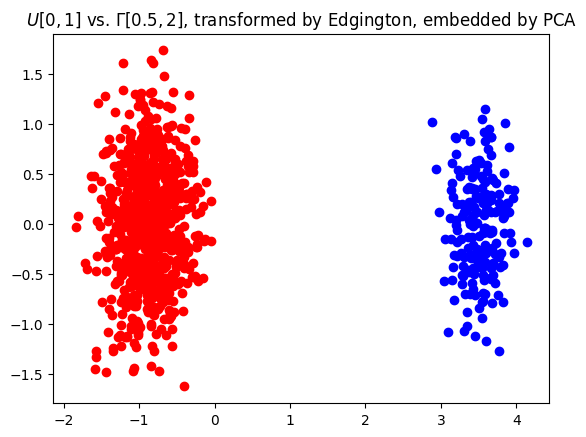

11.512925464970229


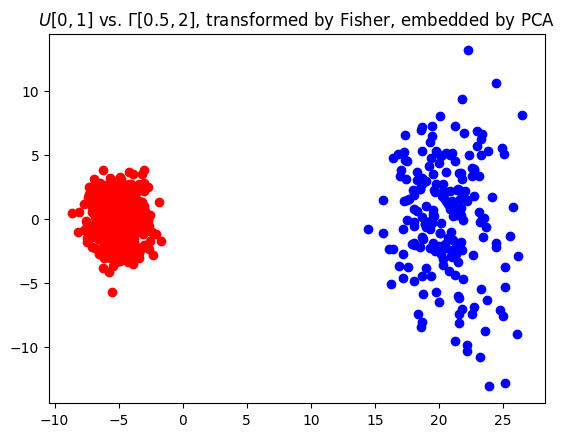

11.512925464970229


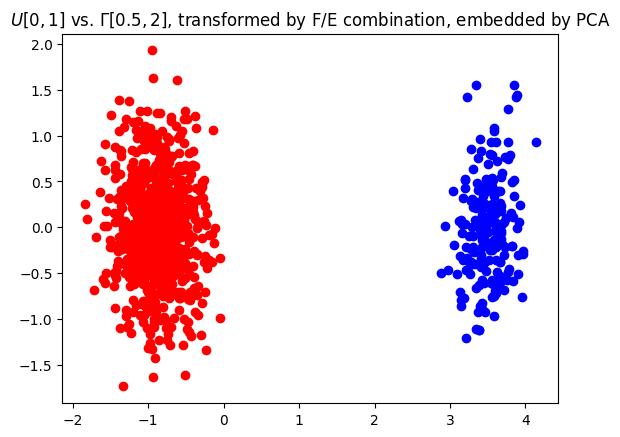

11.512925464970229


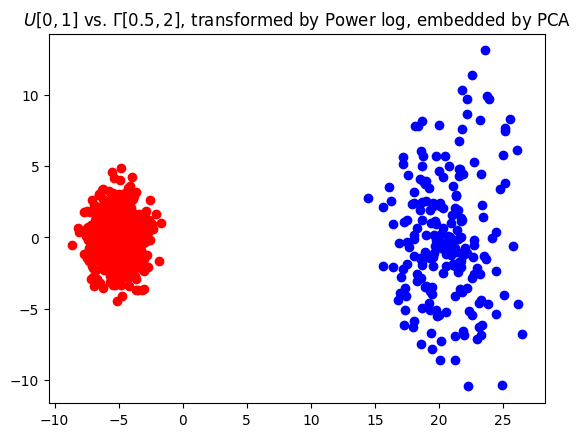

 17%|█▋        | 1/6 [00:02<00:10,  2.08s/it]

11.512925464970229


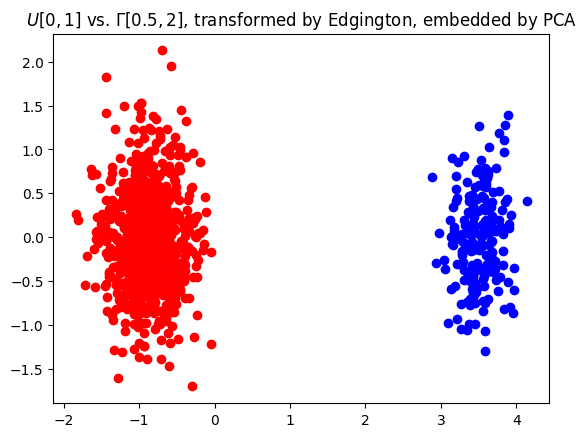

11.512925464970229


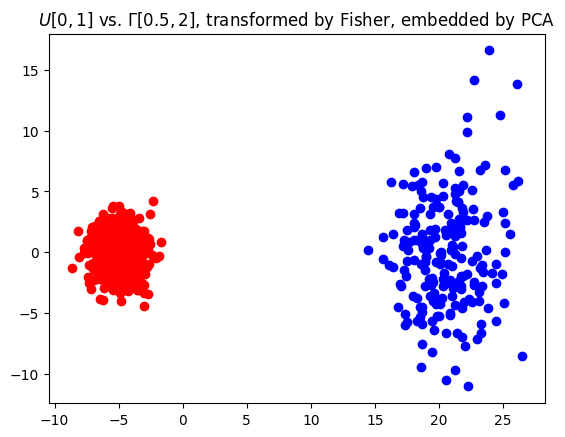

11.512925464970229


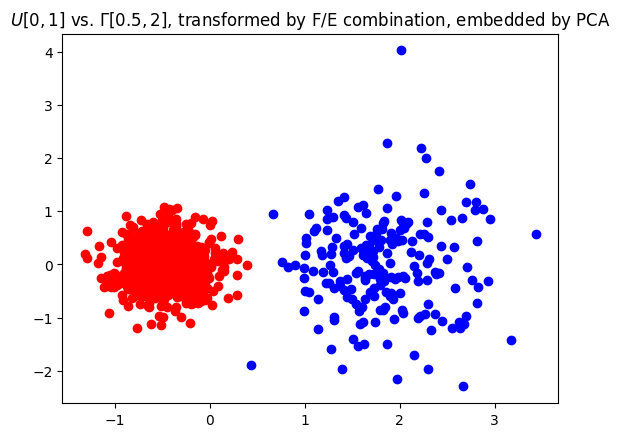

5.991464547107982


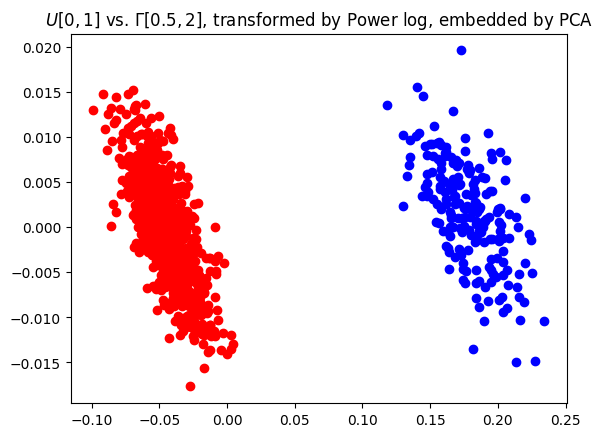

 33%|███▎      | 2/6 [00:03<00:07,  1.99s/it]

11.512925464970229


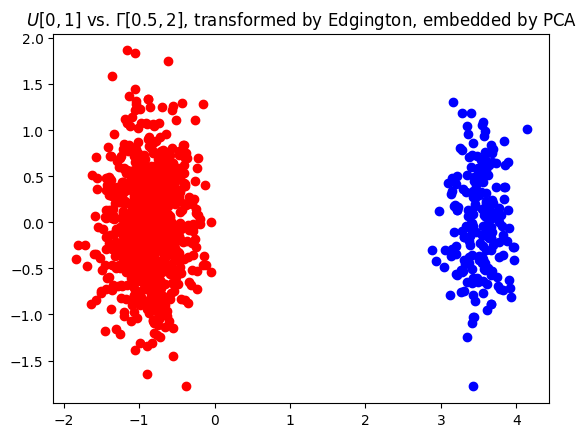

11.512925464970229


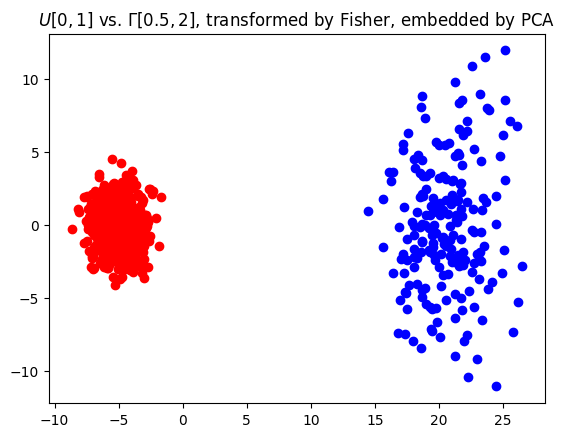

11.512925464970229


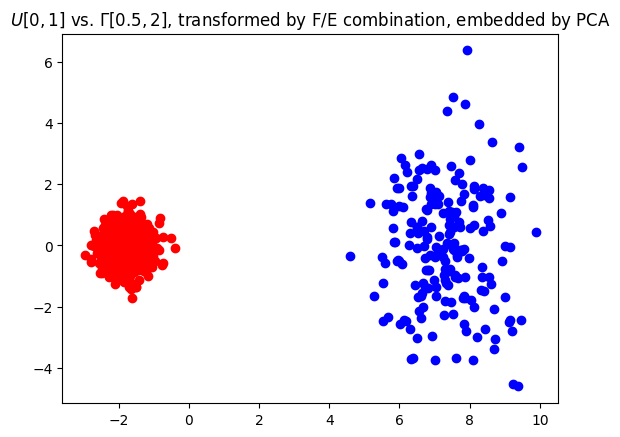

11.512925464970229


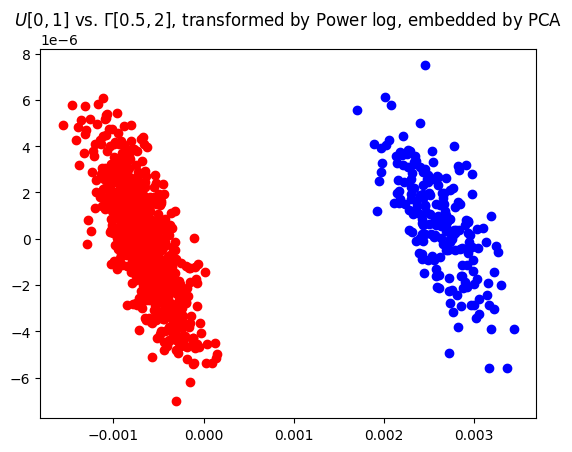

 50%|█████     | 3/6 [00:06<00:06,  2.02s/it]

11.512925464970229


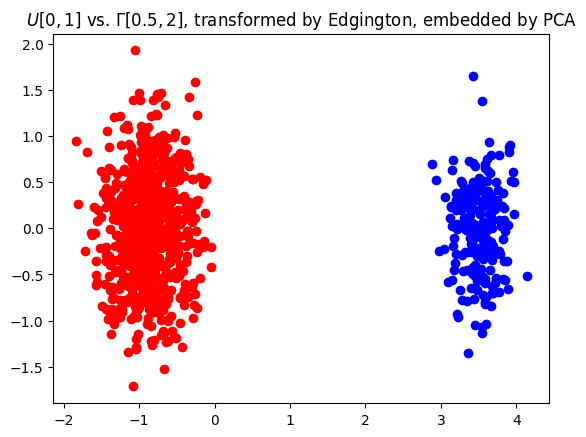

11.512925464970229


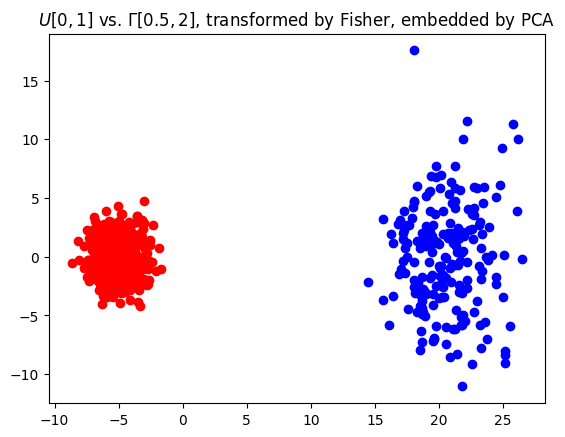

11.512925464970229


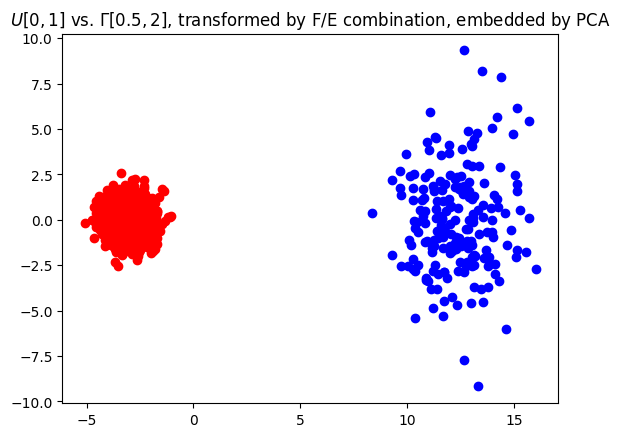

11.512925464970229


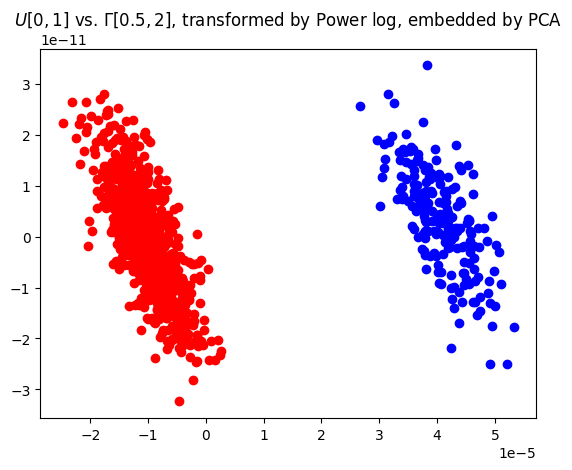

 67%|██████▋   | 4/6 [00:08<00:04,  2.06s/it]

11.512925464970229


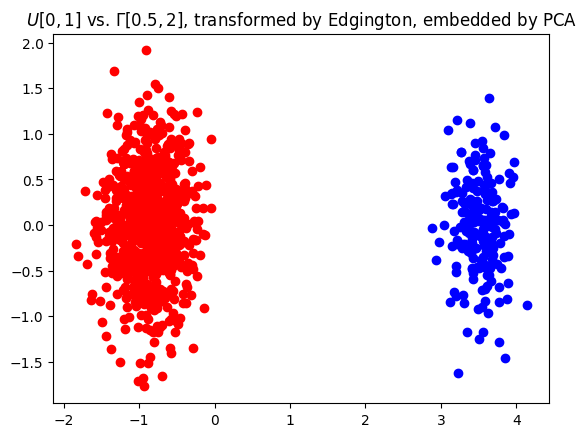

11.512925464970229


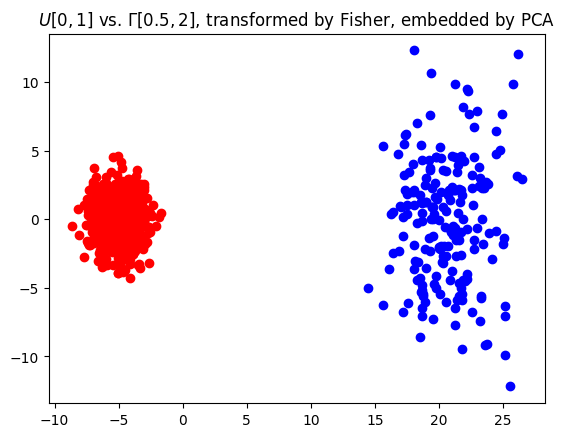

11.512925464970229


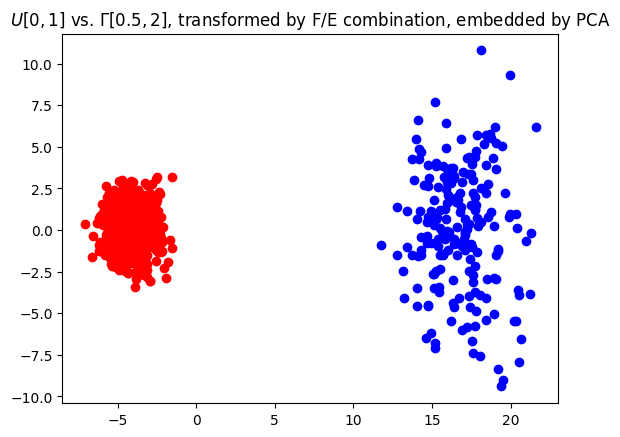

11.512925464970229


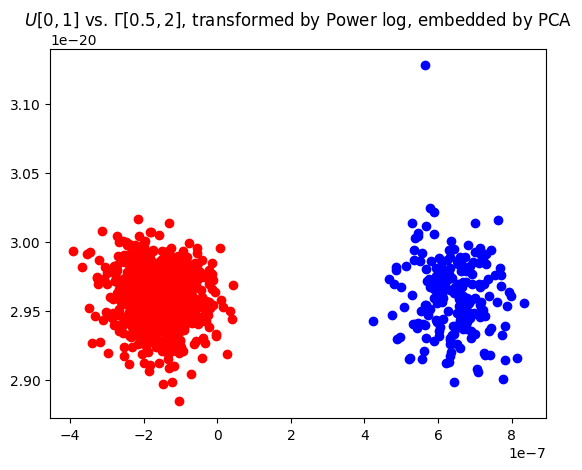

 83%|████████▎ | 5/6 [00:10<00:02,  2.00s/it]

11.512925464970229


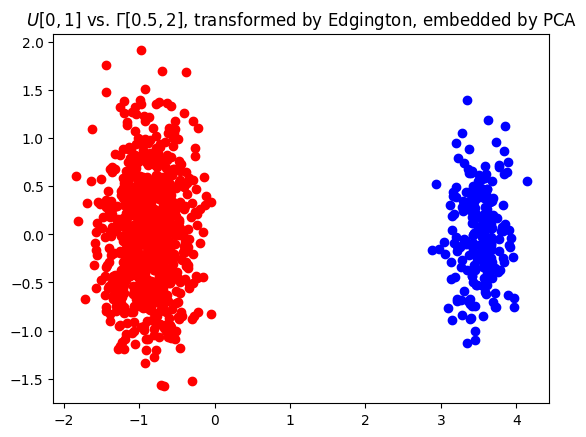

11.512925464970229


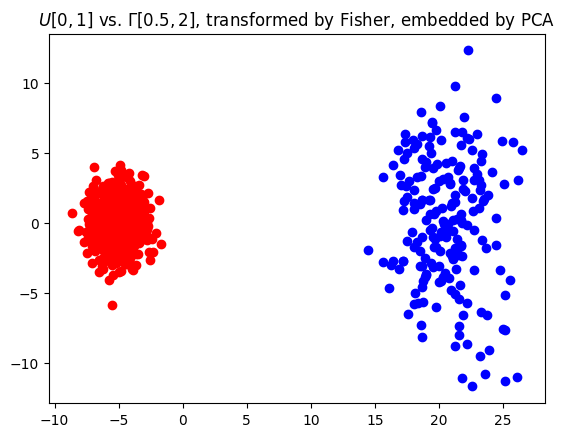

11.512925464970229


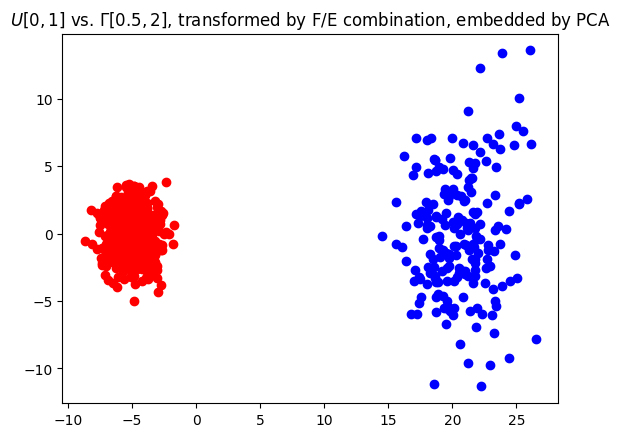

11.512925464970229


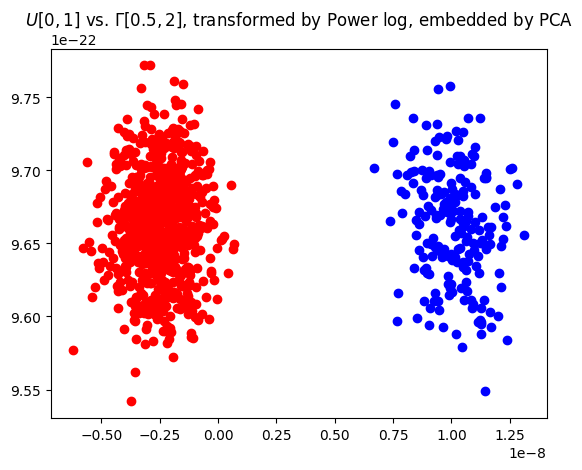

100%|██████████| 6/6 [00:12<00:00,  2.05s/it]

11.512925464970229


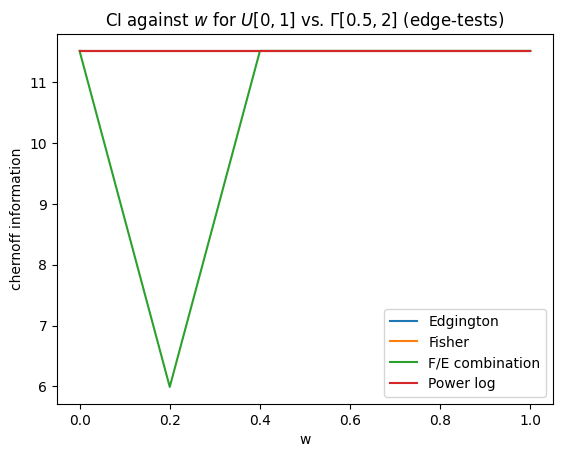

In [ ]:
for ga in [0.5,1,2]:
    for gb in [2,1,0.5]:
        w = -1
        if 1 + gb - ga != 0:
            w = (1 - ga)/(1 + gb - ga)
        gamma_dists, gamma_params = sampling.standard_dist_matrix(scipy.stats.gamma, [ga,0,1/gb])
        model = sampling.WSBM(f"$\Gamma[{ga},{gb}]$", gamma_dists, gamma_params, np.array([0.2,0.8]))
        plotting.plot_transforms_empirical(model, transforms.TRANSFORMS, 1, gran = 5, mode = "PCA")
        break
    break

  0%|          | 0/6 [00:00<?, ?it/s]

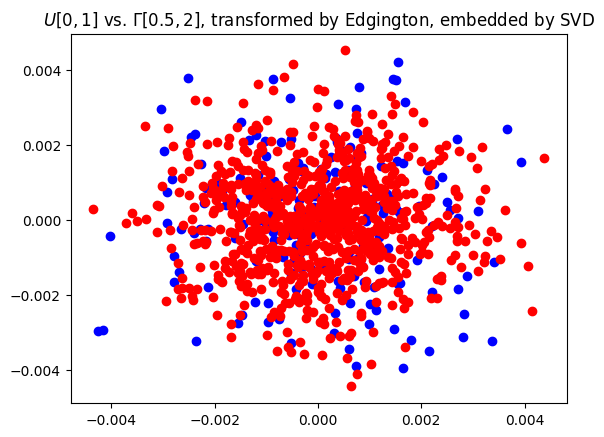

0.037403638301092945


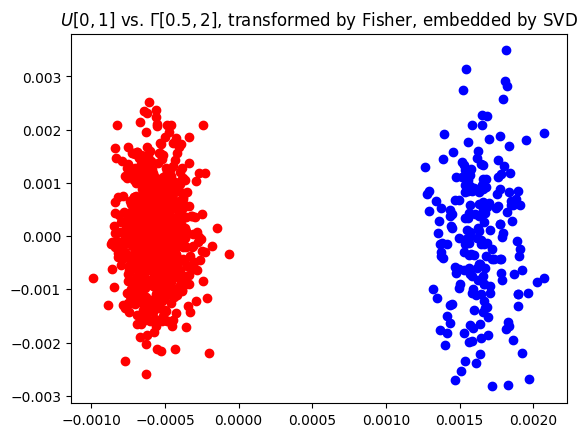

11.512925464970229


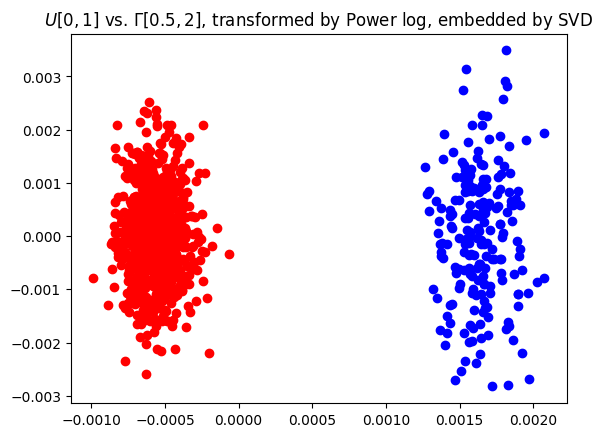

11.512925464970229


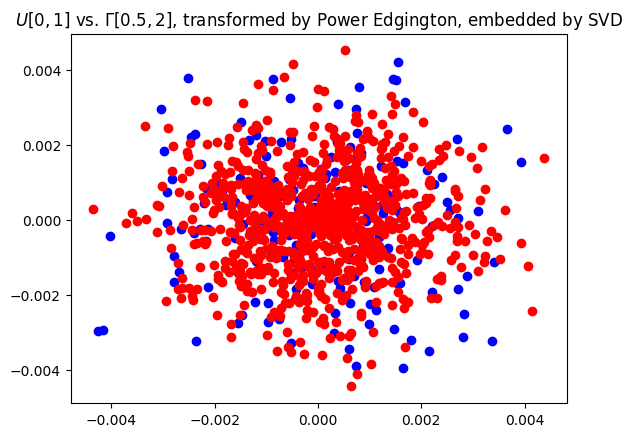

 17%|█▋        | 1/6 [00:06<00:34,  6.87s/it]

0.037403638301092945


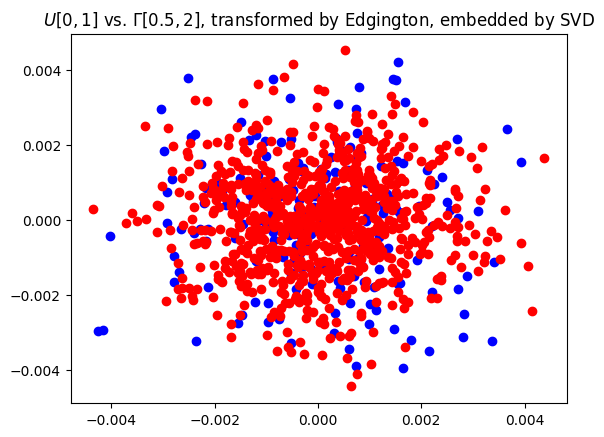

0.037403638301092945


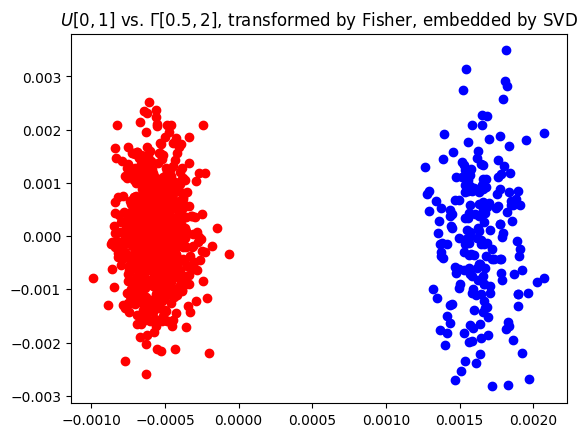

11.512925464970229


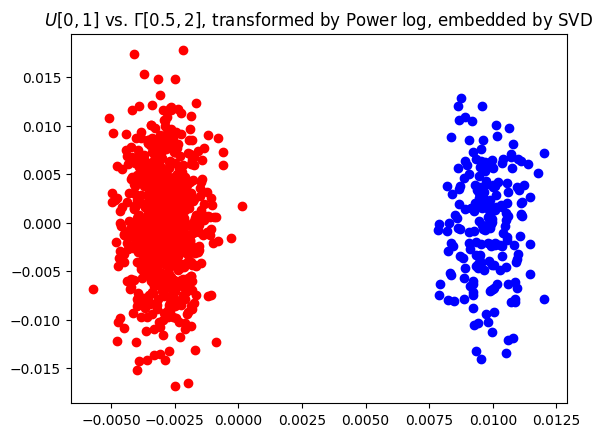

11.512925464970229


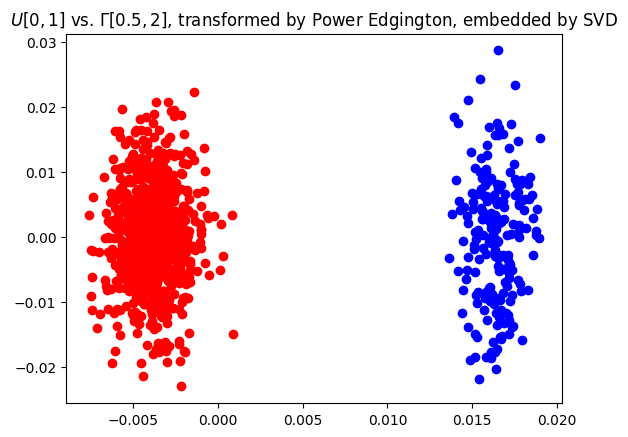

 33%|███▎      | 2/6 [00:12<00:25,  6.30s/it]

11.512925464970229


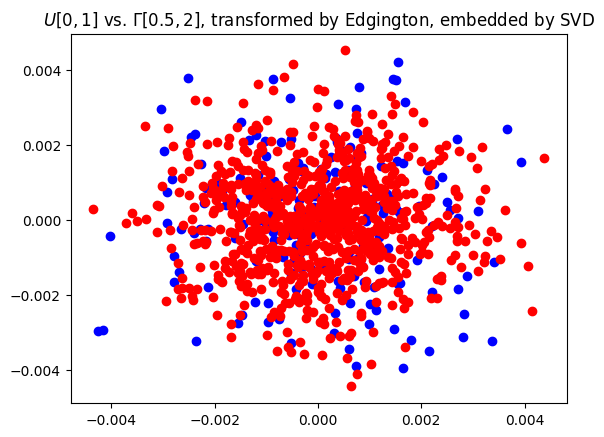

0.037403638301092945


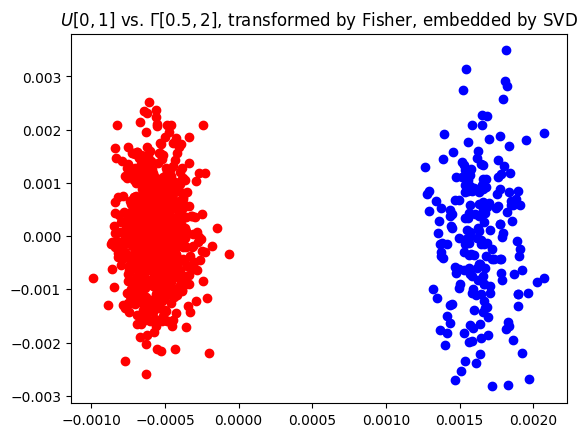

11.512925464970229


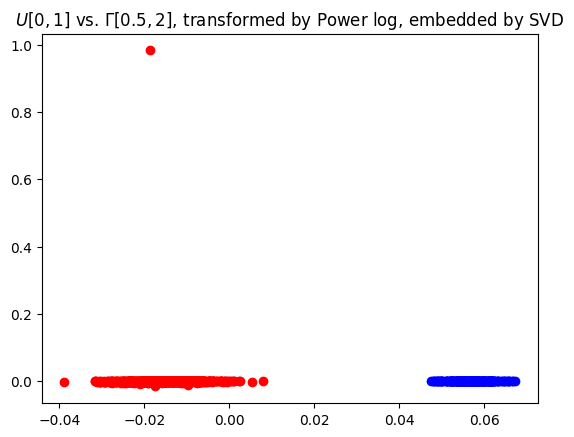

11.512925464970229


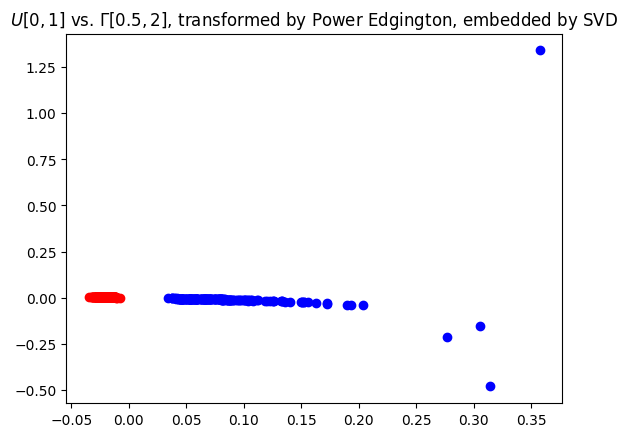

 50%|█████     | 3/6 [00:18<00:18,  6.26s/it]

2.900422070429165


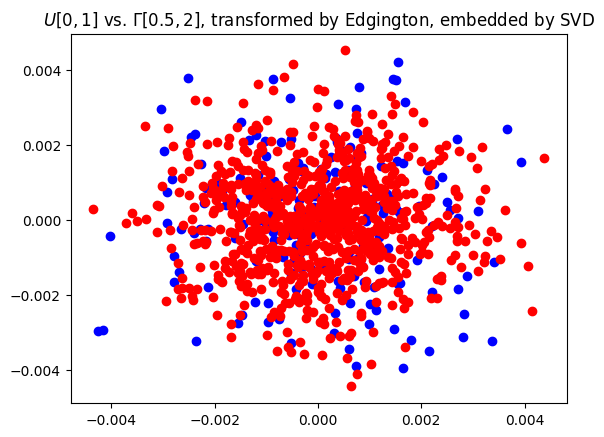

0.037403638301092945


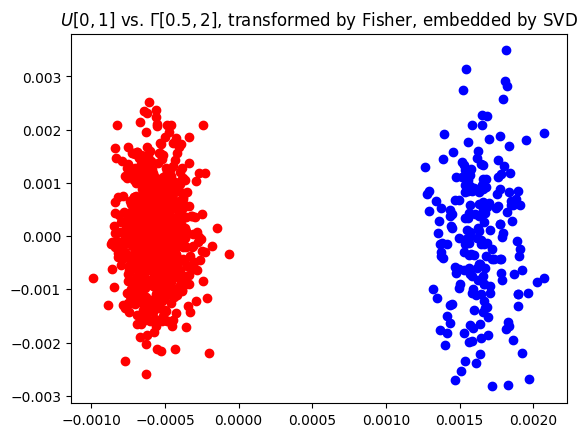

11.512925464970229


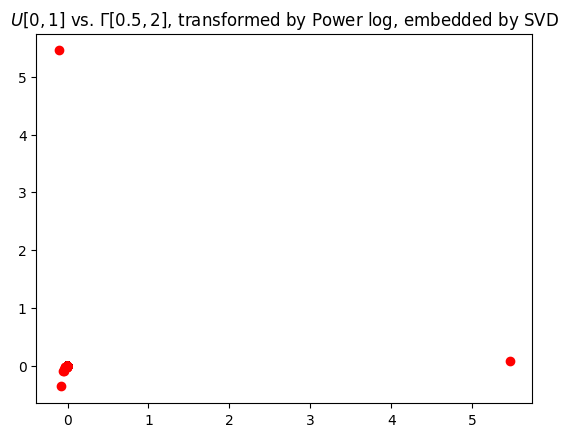

0.0012515651090592628


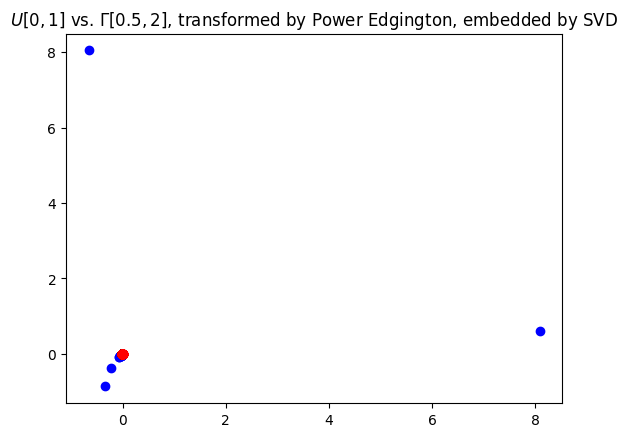

 67%|██████▋   | 4/6 [00:23<00:11,  5.72s/it]

0.010050334189487295


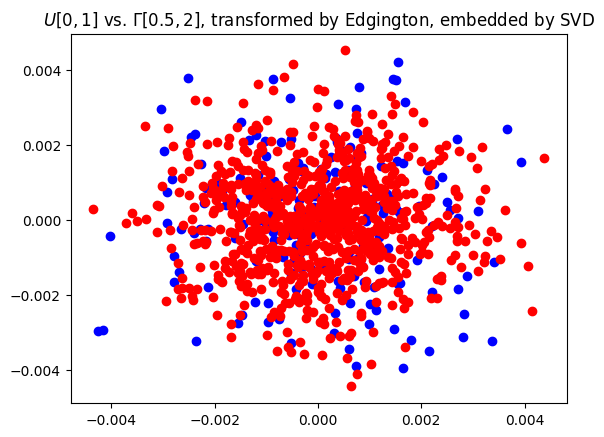

0.037403638301092945


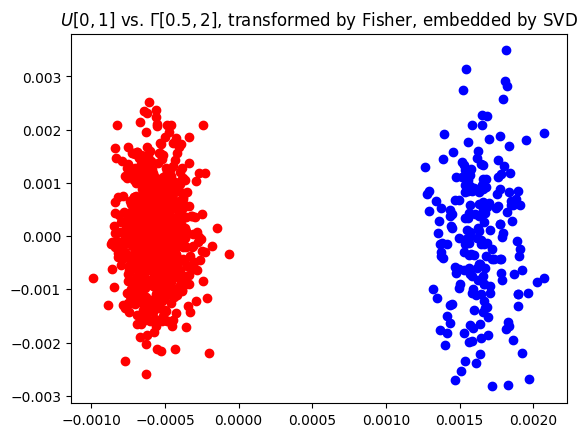

11.512925464970229


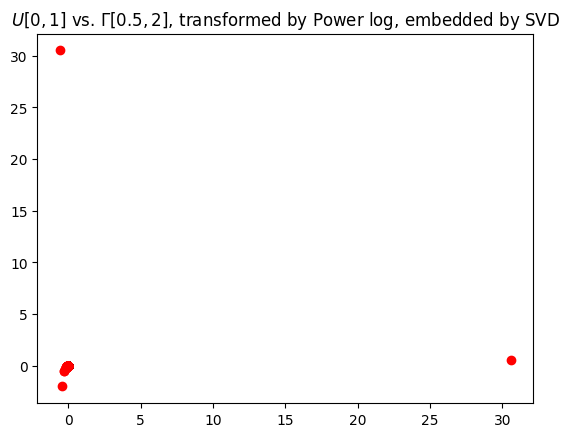

0.0012515651090592628


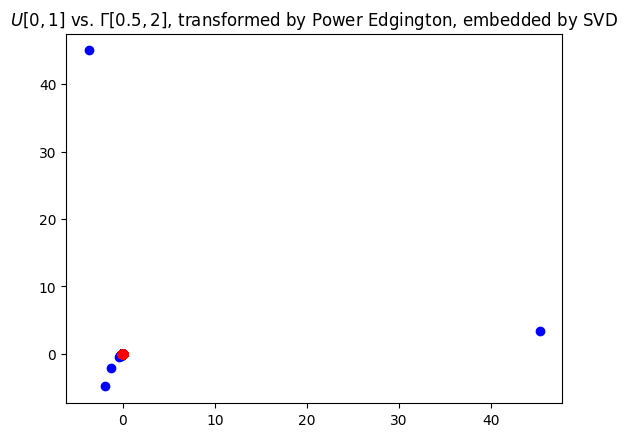

 83%|████████▎ | 5/6 [00:29<00:05,  5.58s/it]

0.010050334189487295


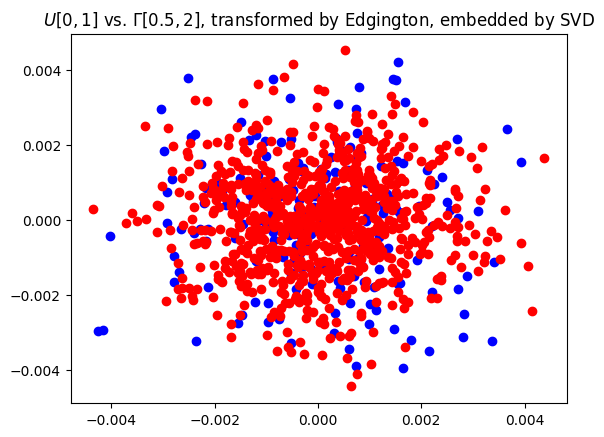

0.037403638301092945


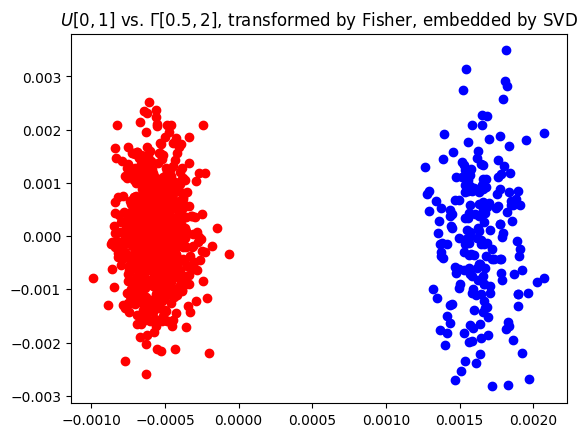

11.512925464970229


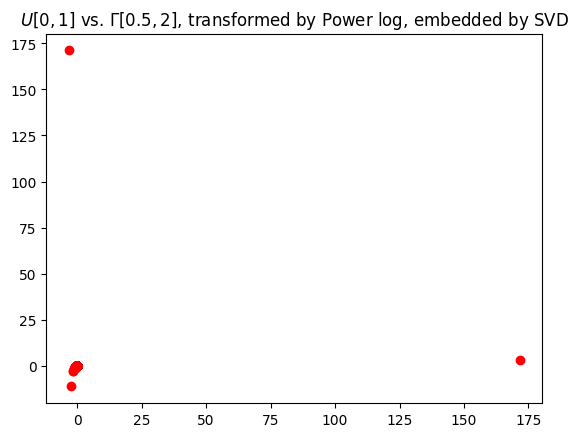

0.0012515651090592628


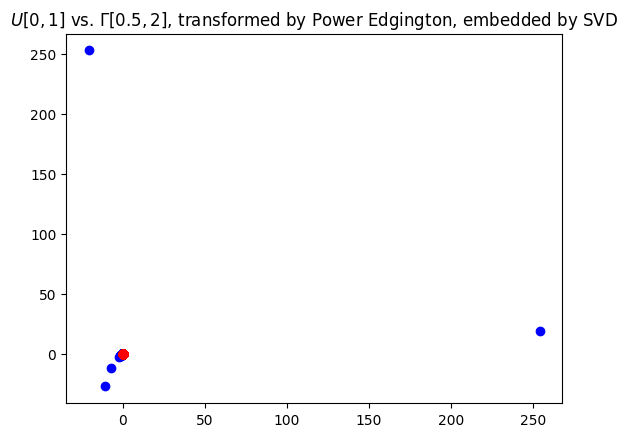

100%|██████████| 6/6 [00:34<00:00,  5.72s/it]

0.010050334189487295


KeyboardInterrupt: 

In [ ]:
for ga in [0.5,1,2]:
    for gb in [2,1,0.5]:
        w = -1
        if 1 + gb - ga != 0:
            w = (1 - ga)/(1 + gb - ga)
        gamma_dists, gamma_params = sampling.standard_dist_matrix(scipy.stats.gamma, [ga,0,1/gb])
        model = sampling.WSBM(f"$\Gamma[{ga},{gb}]$", gamma_dists, gamma_params, np.array([0.2,0.8]))
        plotting.plot_transforms_empirical(model, transforms.TRANSFORMS, 1, gran = 5)
        break
    break

100%|██████████| 6/6 [00:07<00:00,  1.18s/it]


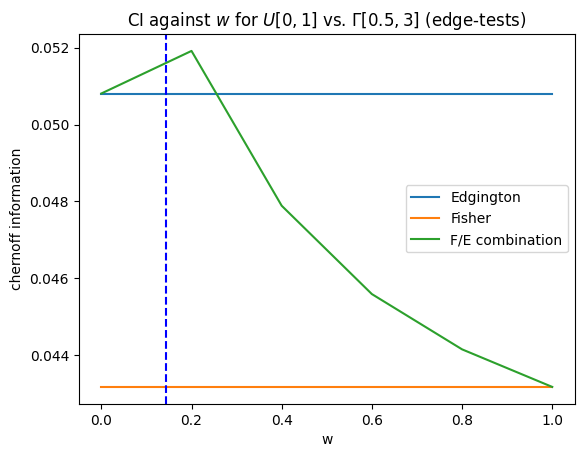

100%|██████████| 6/6 [00:07<00:00,  1.19s/it]


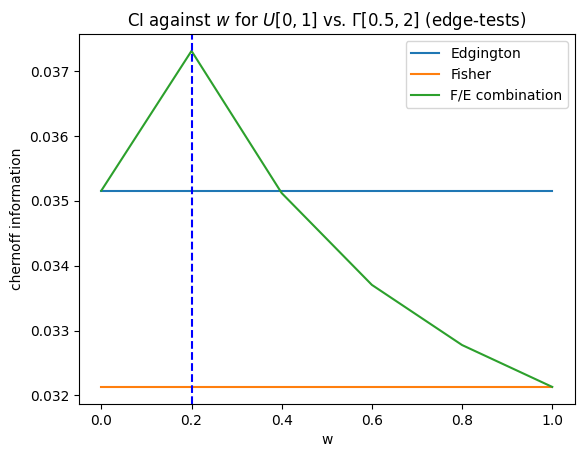

100%|██████████| 6/6 [00:07<00:00,  1.18s/it]


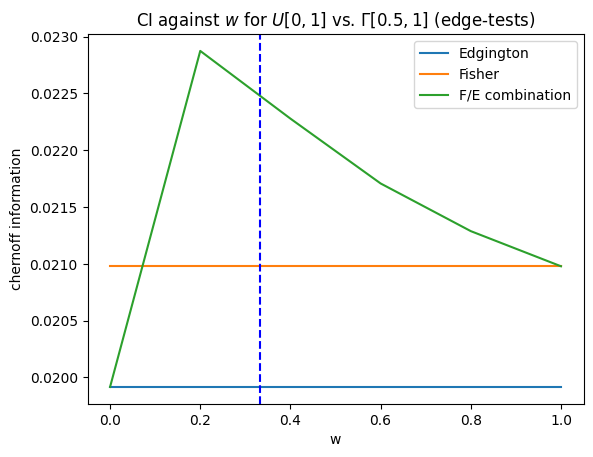

100%|██████████| 6/6 [00:06<00:00,  1.16s/it]


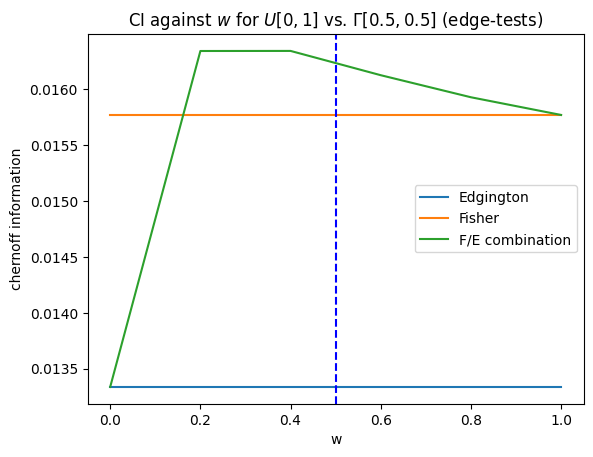

100%|██████████| 6/6 [00:07<00:00,  1.18s/it]


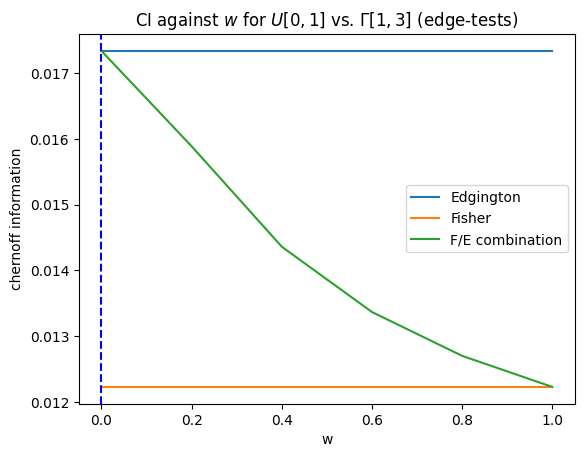

100%|██████████| 6/6 [00:07<00:00,  1.18s/it]


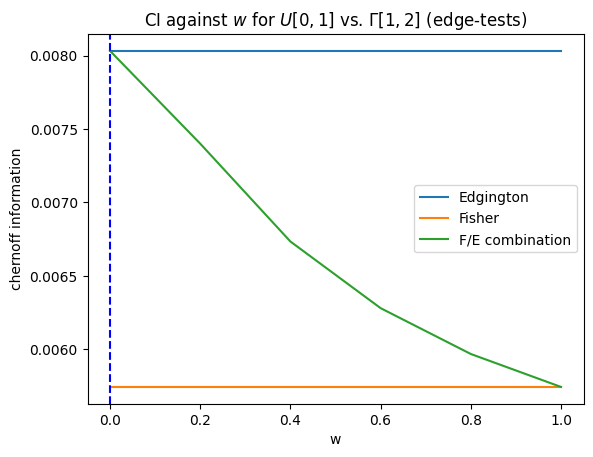

100%|██████████| 6/6 [00:06<00:00,  1.17s/it]


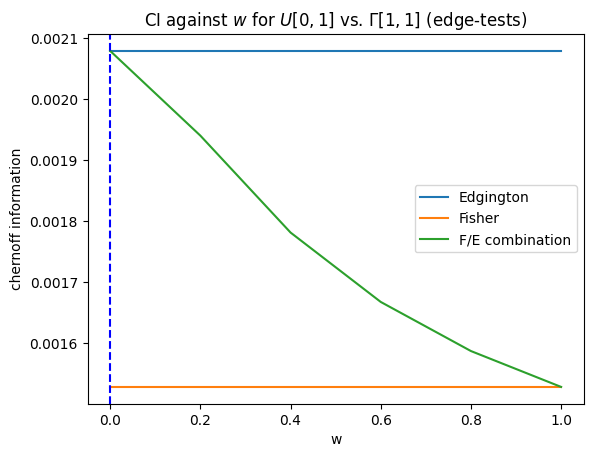

100%|██████████| 6/6 [00:07<00:00,  1.17s/it]


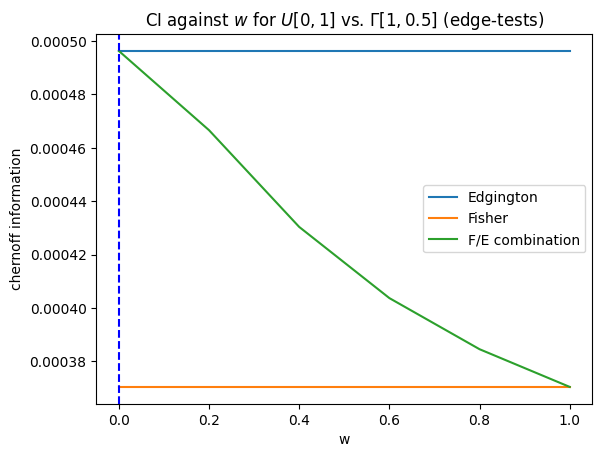

100%|██████████| 6/6 [00:07<00:00,  1.20s/it]


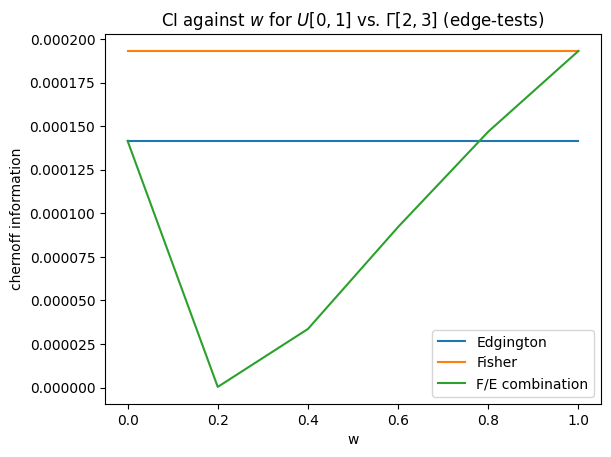

100%|██████████| 6/6 [00:07<00:00,  1.18s/it]


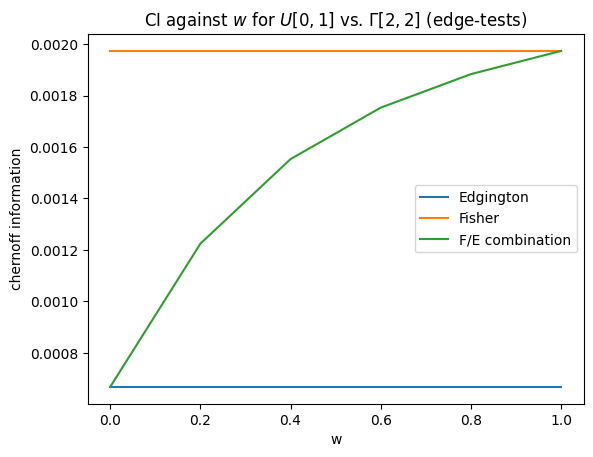

100%|██████████| 6/6 [00:07<00:00,  1.19s/it]


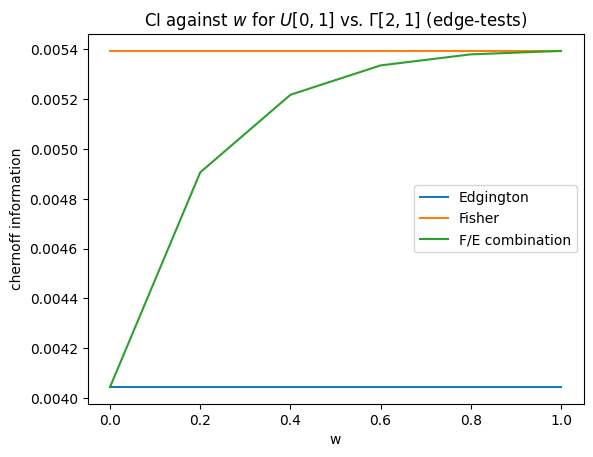

100%|██████████| 6/6 [00:07<00:00,  1.18s/it]


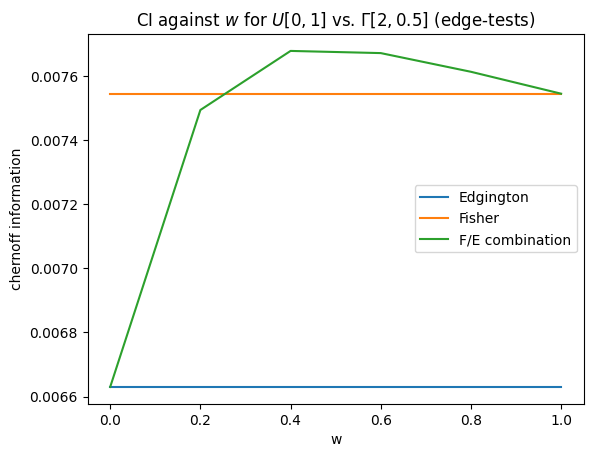

In [ ]:
pi = 0.1
S_PI = [pi, (1 - pi)]
for ga in [0.5,1,2]:
    for gb in [3,2,1,0.5]:
        w = -1
        if 1 + gb - ga != 0:
            w = (1 - ga)/(1 + gb - ga)
        gamma_dists, gamma_params = sampling.standard_dist_matrix(scipy.stats.gamma, [ga,0,1/gb])
        model = sampling.WSBM(f"$\Gamma[{ga},{gb}]$", gamma_dists, gamma_params, np.array([0.2,0.8]))
        plotting.plot_transforms_analytic(model, transforms.TRANSFORMS[:3], 1, w = w, gran = 5, show_stats = False)

100%|██████████| 6/6 [00:31<00:00,  5.29s/it]


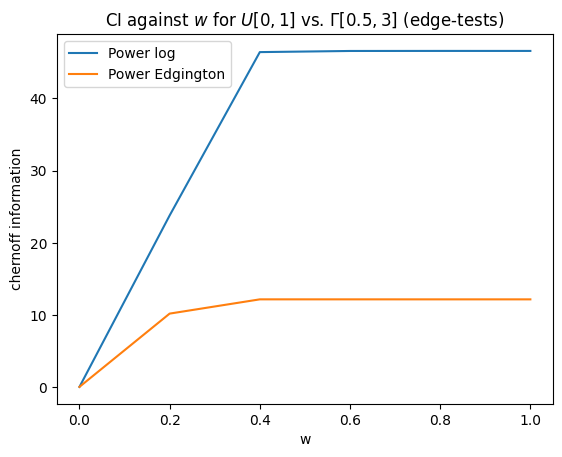

100%|██████████| 6/6 [00:32<00:00,  5.40s/it]


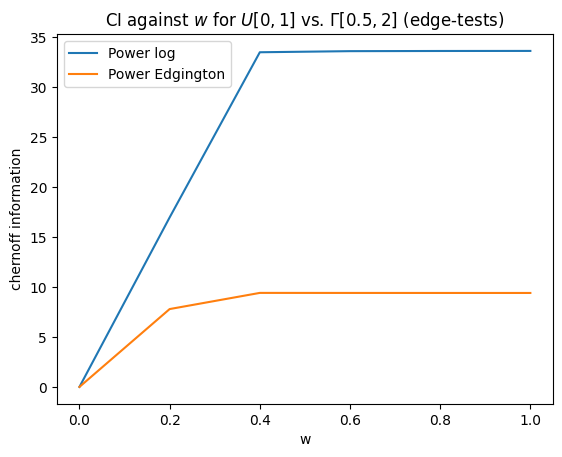

100%|██████████| 6/6 [00:32<00:00,  5.49s/it]


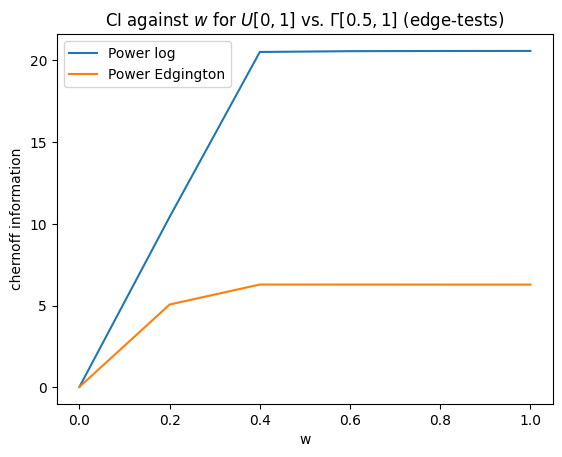

100%|██████████| 6/6 [00:30<00:00,  5.07s/it]


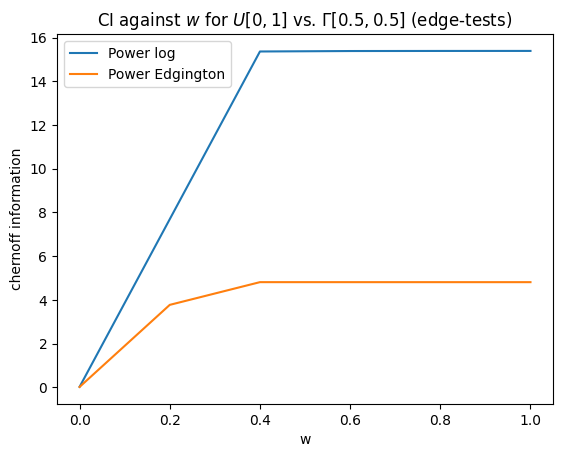

100%|██████████| 6/6 [00:30<00:00,  5.09s/it]


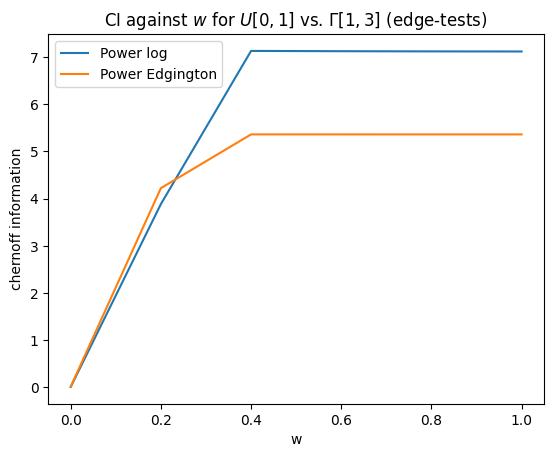

100%|██████████| 6/6 [00:30<00:00,  5.05s/it]


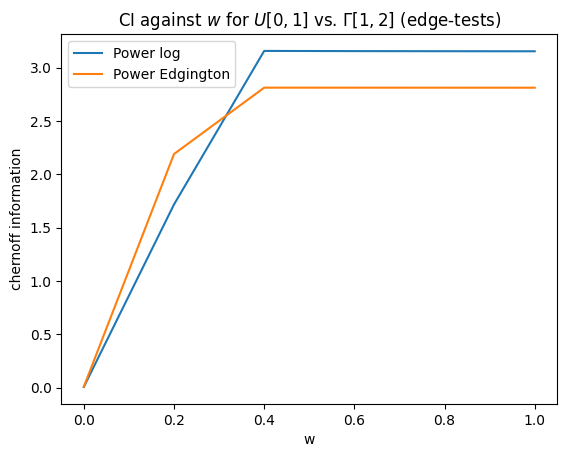

100%|██████████| 6/6 [00:31<00:00,  5.21s/it]


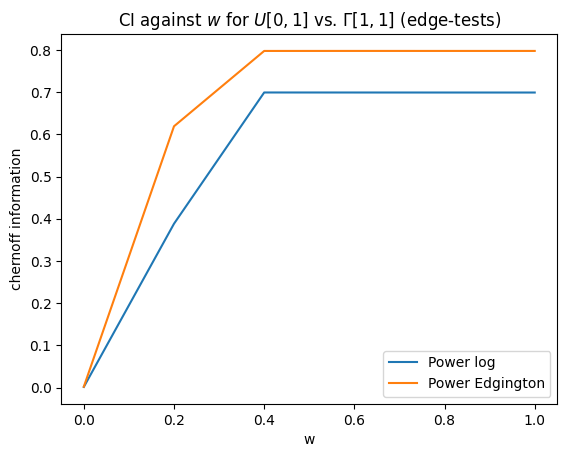

100%|██████████| 6/6 [00:31<00:00,  5.18s/it]


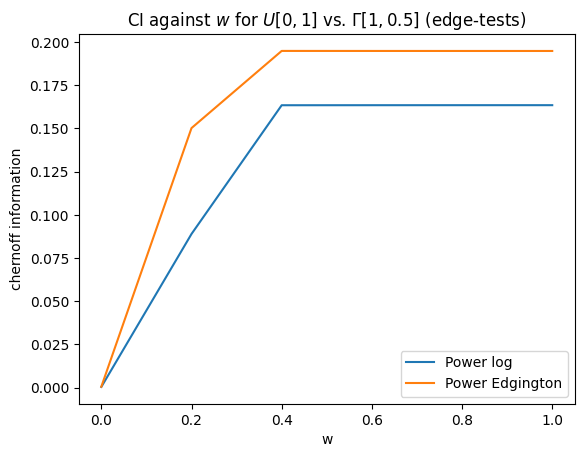

100%|██████████| 6/6 [00:31<00:00,  5.21s/it]


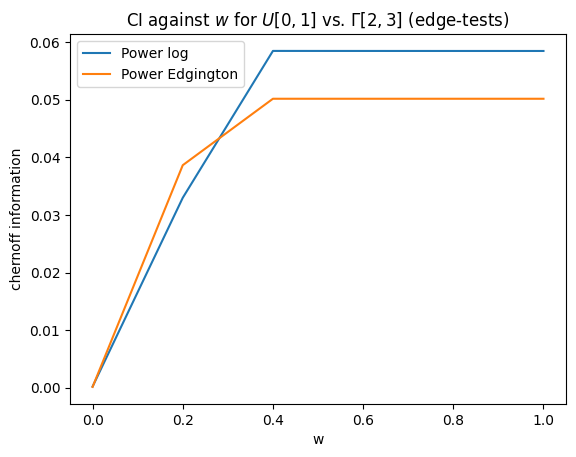

100%|██████████| 6/6 [00:30<00:00,  5.07s/it]


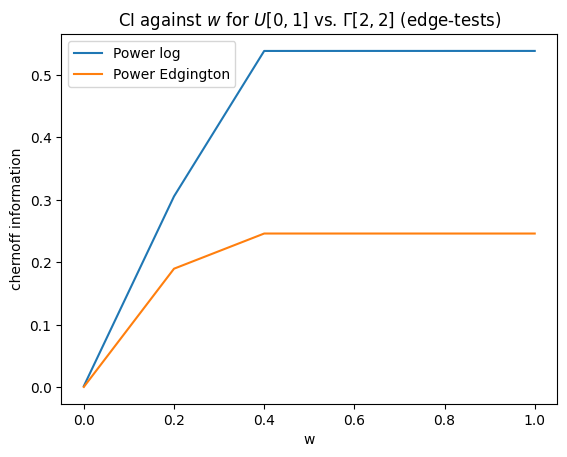

100%|██████████| 6/6 [00:31<00:00,  5.22s/it]


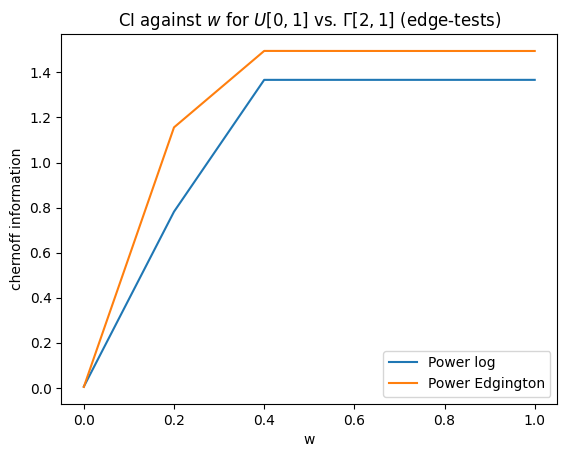

100%|██████████| 6/6 [00:30<00:00,  5.13s/it]


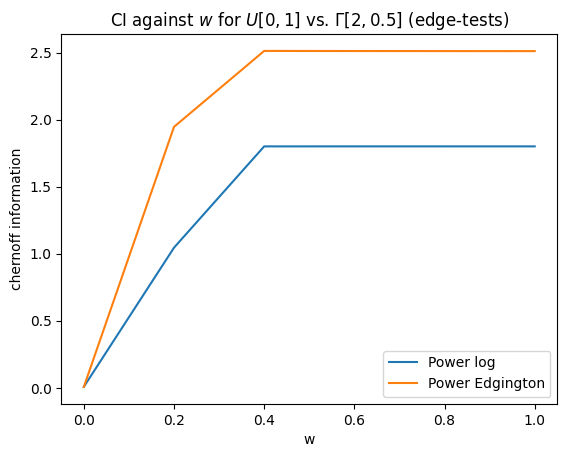

In [ ]:
pi = 0.1
S_PI = [pi, (1 - pi)]
for ga in [0.5,1,2]:
    for gb in [3,2,1,0.5]:
        w = -1
        if 1 + gb - ga != 0:
            w = (1 - ga)/(1 + gb - ga)
        gamma_dists, gamma_params = sampling.standard_dist_matrix(scipy.stats.gamma, [ga,0,1/gb])
        model = sampling.WSBM(f"$\Gamma[{ga},{gb}]$", gamma_dists, gamma_params, np.array([0.2,0.8]))
        plotting.plot_transforms_analytic(model, transforms.TRANSFORMS[3:], 1, gran = 5, show_stats = False)